In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import xgboost as xgb
import random

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import preprocessing
from scikitplot.metrics import plot_cumulative_gain, plot_confusion_matrix, plot_roc
from sklearn.metrics import accuracy_score, classification_report
from xgboost.sklearn import XGBClassifier

import nbimporter
from Performance_classification_sleepclass_Nicolas import database, GBC, XGB

D:\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
D:\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
D:\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Importing Jupyter notebook from Performance_classification_sleepclass_Nicolas.ipynb


In [2]:
data_raw = ['2020-05-27--20.37-08.55-vitals.csv', '2020-05-28--22.22-07.57-vitals.csv', 
            '2020-05-29--21.01-09.06-vitals.csv', '2020-05-30--22.27-08.35-vitals.csv', 
            '2020-05-31--22.53-08.53-vitals.csv', '2020-06-01--21.28-07.19-vitals.csv', 
            '2020-06-02--21.03-07.39-vitals.csv', '2020-06-03--21.22-07.49-vitals.csv', 
            '2020-06-04--19.50-07.13-vitals.csv', '2020-06-05--22.23-08.40-vitals.csv', 
            '2020-06-06--21.58-08.32-vitals.csv', '2020-06-07--21.40-07.45-vitals.csv', 
            '2020-06-11--22.11-08.55-vitals.csv', '2020-06-14--21.05-08.54-vitals.csv', 
            '2020-06-16--03.18-08.49-vitals.csv', '2020-06-16--23.05-10.40-vitals.csv', 
            '2020-06-17--23.22-10.26-vitals.csv', '2020-06-21--21.44-08.41-vitals.csv', 
            '2020-06-22--23.16-08.32-vitals.csv', '2020-06-23--22.22-09.37-vitals.csv', 
            '2020-06-24--22.51-09.06-vitals.csv', '2020-06-25--22.35-09.39-vitals.csv']

data_hrv = ['2020-05-27--20.37-08.55-hrv.csv', '2020-05-28--22.22-07.57-hrv.csv', 
            '2020-05-29--21.01-09.06-hrv.csv', '2020-05-30--22.27-08.35-hrv.csv', 
            '2020-05-31--22.53-08.53-hrv.csv', '2020-06-01--21.28-07.19-hrv.csv', 
            '2020-06-02--21.03-07.39-hrv.csv', '2020-06-03--21.22-07.49-hrv.csv', 
            '2020-06-04--19.50-07.13-hrv.csv', '2020-06-05--22.23-08.40-hrv.csv', 
            '2020-06-06--21.58-08.32-hrv.csv', '2020-06-07--21.40-07.45-hrv.csv', 
            '2020-06-11--22.11-08.55-hrv.csv', '2020-06-14--21.05-08.54-hrv.csv', 
            '2020-06-16--03.18-08.49-hrv.csv', '2020-06-16--23.05-10.40-hrv.csv', 
            '2020-06-17--23.22-10.26-hrv.csv', '2020-06-21--21.44-08.41-hrv.csv', 
            '2020-06-22--23.16-08.32-hrv.csv', '2020-06-23--22.22-09.37-hrv.csv', 
            '2020-06-24--22.51-09.06-hrv.csv', '2020-06-25--22.35-09.39-hrv.csv']

data_sleepclass = ['2020-05-27--20.37-08.55-sleepclasses.csv', '2020-05-28--22.22-07.57-sleepclasses.csv', 
             '2020-05-29--21.01-09.06-sleepclasses.csv', '2020-05-30--22.27-08.35-sleepclasses.csv', 
             '2020-05-31--22.53-08.53-sleepclasses.csv', '2020-06-01--21.28-07.19-sleepclasses.csv', 
             '2020-06-02--21.03-07.39-sleepclasses.csv', '2020-06-03--21.22-07.49-sleepclasses.csv', 
             '2020-06-04--19.50-07.13-sleepclasses.csv', '2020-06-05--22.23-08.40-sleepclasses.csv', 
             '2020-06-06--21.58-08.32-sleepclasses.csv', '2020-06-07--21.40-07.45-sleepclasses.csv', 
             '2020-06-11--22.11-08.55-sleepclasses.csv', '2020-06-14--21.05-08.54-sleepclasses.csv', 
             '2020-06-16--03.18-08.49-sleepclasses.csv', '2020-06-16--23.05-10.40-sleepclasses.csv', 
             '2020-06-17--23.22-10.26-sleepclasses.csv', '2020-06-21--21.44-08.41-sleepclasses.csv', 
             '2020-06-22--23.16-08.32-sleepclasses.csv', '2020-06-23--22.22-09.37-sleepclasses.csv', 
             '2020-06-24--22.51-09.06-sleepclasses.csv', '2020-06-25--22.35-09.39-sleepclasses.csv']

In [3]:
df_allnight = pd.DataFrame()
for a, b, c in zip(data_raw, data_hrv, data_sleepclass):
    df = database(a, b, c)
    
    #feature scaling
#     scaler = preprocessing.StandardScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)
#     X = scaler.transform(X)
    
    df_allnight = pd.concat([df_allnight, df])

Night: 27/05/2020 19: 05 - 26/06/2020 07: 06
Shape of X: (204079, 8)
Shape of y: (204079,)
Classification Report
              precision    recall  f1-score   support

         1.0       0.73      0.35      0.48     10506
         2.0       0.63      0.85      0.73     29069
         3.0       0.60      0.44      0.51     12071
         4.0       0.60      0.52      0.56      7437
         5.0       0.55      0.35      0.43      2141

    accuracy                           0.63     61224
   macro avg       0.62      0.50      0.54     61224
weighted avg       0.63      0.63      0.61     61224



0    0.629
dtype: float64

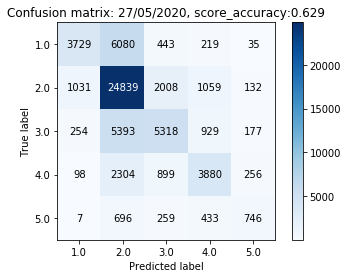

In [4]:
GBC(df_allnight)

Night: 27/05/2020 19: 05 - 26/06/2020 07: 06
Shape of X: (204079, 8)
Shape of y: (204079,)
              precision    recall  f1-score   support

         0.0       0.77      0.43      0.55     10506
         1.0       0.66      0.86      0.75     29069
         2.0       0.63      0.49      0.55     12071
         3.0       0.66      0.57      0.61      7437
         4.0       0.58      0.39      0.46      2141

    accuracy                           0.66     61224
   macro avg       0.66      0.55      0.59     61224
weighted avg       0.67      0.66      0.65     61224



0    0.664
dtype: float64

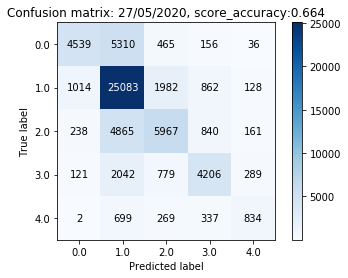

In [5]:
XGB(df_allnight)

## Hyperparameter

In [4]:
X = df_allnight.iloc[:, df_allnight.columns != 'sleep_class']
y = df_allnight.iloc[:, df_allnight.columns == 'sleep_class'].squeeze()
print('Night: '+ df_allnight.index[0].strftime('%d/%m/%Y %H: %m') + " - " + df_allnight.index[-1].strftime('%d/%m/%Y %H: %m'))
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#feature scaling
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X = scaler.transform(X)

#train_set and test_set for xgb
y_train = pd.to_numeric(y_train-1)
y_test = pd.to_numeric(y_test-1)

D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

Night: 27/05/2020 19: 05 - 26/06/2020 07: 06
Shape of X: (204079, 8)
Shape of y: (204079,)


### Step 1: Fix learning rate and number of estimators for tuning tree-based parameters

In [5]:
# param = {
#     'learning_rate': 0.1,
#     'n_estimator': 1000,
#     'max_depth': 5,  
#     'min_child_weight': 1,
#     'gamma': 0,
#     'subsample': 0.8,
#     'colsample_bytree': 0.8,
#     'objective': 'multi:softprob',
#     'scale_pos_weight': 1,
#     'num_class': 5} 

#n_estimators = 500  # The number of training iterations

xgb1 = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, objective='multi:softmax', gamma=0, \
                      min_child_weight=1, subsample=0.8, colsample_bytree=0.8, n_jobs=-1)
xgb1.fit(X_train, y_train)

y_pre = model.predict(X_test)
#best_preds = np.asarray([np.argmax(line) for line in preds])

print(classification_report(y_test, y_pre))
plot_confusion_matrix(y_test, y_pre)

NameError: name 'model' is not defined

In [ ]:
#features importants
df2 = df_allnight.copy()
df2 = df2.drop('sleep_class', axis = 1)
feature_imp = pd.Series(xgb1.feature_importances_, index = df2.columns).sort_values(ascending = False)

sns.barplot(x = feature_imp[0:9], y = feature_imp.index[0:9])
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

### Step 2: Tune max_depth and min_child_weight

In [49]:
clf = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, objective='multi:softmax', gamma=0, \
                      min_child_weight=1, subsample=0.8, colsample_bytree=0.8, n_jobs=-1)
param_test2 = {
 'max_depth': [4, 6, 8, 10, 12],
 'min_child_weight':[1, 3, 5]
}
grid2 = GridSearchCV(clf,
                    param_test2,
                    scoring='accuracy',
                    cv=5, 
                    n_jobs=-1)

grid2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n...
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=0.8, tree_method=None,

In [51]:
res = pd.DataFrame(grid2.cv_results_)
feats = ['param_max_depth','param_min_child_weight', 'mean_test_score', 'rank_test_score']
res[feats].sort_values('rank_test_score').head(20)

,param_max_depth,param_min_child_weight,mean_test_score,rank_test_score
12,12,1,0.791768,1
13,12,3,0.784705,2
14,12,5,0.777922,3
9,10,1,0.749508,4
10,10,3,0.745203,5
11,10,5,0.740366,6
6,8,1,0.691253,7
7,8,3,0.688418,8
8,8,5,0.684932,9
3,6,1,0.631479,10


              precision    recall  f1-score   support

         0.0       0.80      0.56      0.66     10506
         1.0       0.71      0.88      0.79     29069
         2.0       0.70      0.56      0.62     12071
         3.0       0.71      0.64      0.67      7437
         4.0       0.68      0.54      0.60      2141

    accuracy                           0.72     61224
   macro avg       0.72      0.63      0.67     61224
weighted avg       0.72      0.72      0.71     61224



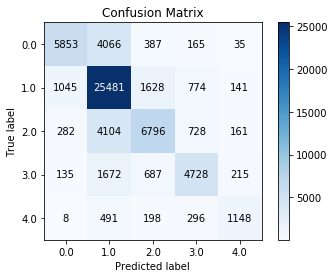

In [54]:
xgb2 = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, objective='multi:softmax', gamma=0, \
                      min_child_weight=1, subsample=0.8, colsample_bytree=0.8, n_jobs=-1)
xgb2.fit(X_train, y_train)

y_pre = model.predict(X_test)
#best_preds = np.asarray([np.argmax(line) for line in preds])

print(classification_report(y_test, y_pre))
plot_confusion_matrix(y_test, y_pre)

**Result: max_depth = 8, min_child_weight = 1**

### Step 3: Tune gamma

In [56]:
clf = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, objective='multi:softmax', gamma=0, \
                      min_child_weight=1, subsample=0.8, colsample_bytree=0.8, n_jobs=-1)
param_test3 = {
 'gamma': [0, 0.1, 0.2, 0.3]
}
grid3 = GridSearchCV(clf,
                    param_test3,
                    scoring='accuracy',
                    cv=5, 
                    n_jobs=-1)

grid3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=8, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n...s=-1,
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
   

In [58]:
res = pd.DataFrame(grid3.cv_results_)
feats = ['param_gamma', 'mean_test_score', 'rank_test_score']
res[feats].sort_values('rank_test_score').head(20)

,param_gamma,mean_test_score,rank_test_score
3,0.3,0.691785,1
1,0.1,0.691708,2
2,0.2,0.691631,3
0,0,0.691253,4


              precision    recall  f1-score   support

         0.0       0.80      0.56      0.66     10506
         1.0       0.71      0.88      0.79     29069
         2.0       0.70      0.56      0.62     12071
         3.0       0.71      0.64      0.67      7437
         4.0       0.68      0.54      0.60      2141

    accuracy                           0.72     61224
   macro avg       0.72      0.63      0.67     61224
weighted avg       0.72      0.72      0.71     61224



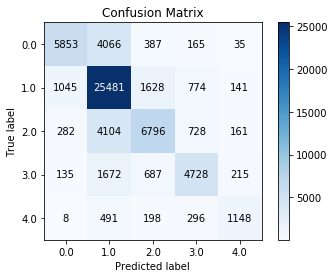

In [59]:
xgb3 = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, objective='multi:softmax', gamma=0, \
                      min_child_weight=1, subsample=0.8, colsample_bytree=0.8, n_jobs=-1)
xgb3.fit(X_train, y_train)

y_pre = model.predict(X_test)
#best_preds = np.asarray([np.argmax(line) for line in preds])

print(classification_report(y_test, y_pre))
plot_confusion_matrix(y_test, y_pre)

**Result: gamma = 0**

### Step 4: Tune subsample and colsample_bytree

In [65]:
clf = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, objective='multi:softmax', gamma=0, \
                      min_child_weight=1, subsample=0.8, colsample_bytree=0.8, n_jobs=-1)
param_test4 = {
    'subsample': [0.7, 0.75, 0.8 ,0.85],
    'colsample_bytree': [0.7, 0.75, 0.8 ,0.85]
}
grid4 = GridSearchCV(clf,
                    param_test4,
                    scoring='accuracy',
                    cv=5, 
                    n_jobs=-1)

grid4.fit(X_train, y_train)

KeyboardInterrupt: 

In [61]:
res = pd.DataFrame(grid.cv_results_)
feats = ['param_subsample', 'colsample_bytree', 'mean_test_score', 'rank_test_score']
res[feats].sort_values('rank_test_score').head(20)

KeyError: "['colsample_bytree', 'param_subsample'] not in index"

In [ ]:
xgb4 = XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, objective='multi:softmax', gamma=0, \
                      min_child_weight=1, subsample=0.8, colsample_bytree=0.8, n_jobs=-1)
xgb4.fit(X_train, y_train)

y_pre = model.predict(X_test)
#best_preds = np.asarray([np.argmax(line) for line in preds])

print(classification_report(y_test, y_pre))
plot_confusion_matrix(y_test, y_pre)

In [6]:
clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.01, 0.10, 0.20, 0.30] ,
     "max_depth"        : [4, 5, 6, 8],
     #"min_child_weight" : [ 1, 3, 5, 7 ],
     #"gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     #"colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters,
                    scoring='accuracy',
                    cv=5, 
                    n_jobs=-1)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estim...
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
       

In [8]:
res = pd.DataFrame(grid.cv_results_)
feats = ['param_max_depth','param_eta', 'mean_test_score', 'rank_test_score']
res[feats].sort_values('rank_test_score').head(20)

,param_max_depth,param_eta,mean_test_score,rank_test_score
15,8,0.3,0.751209,1
11,8,0.2,0.723797,2
14,6,0.3,0.686045,3
7,8,0.1,0.685142,4
10,6,0.2,0.662700,5
13,5,0.3,0.651241,6
9,5,0.2,0.631444,7
6,6,0.1,0.628126,8
12,4,0.3,0.619754,9
3,8,0.01,0.611382,10


              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94       580
         1.0       0.95      0.98      0.96      1368
         2.0       0.95      0.89      0.92       466
         3.0       0.96      0.96      0.96       362
         4.0       0.93      0.93      0.93       138

    accuracy                           0.95      2914
   macro avg       0.95      0.94      0.94      2914
weighted avg       0.95      0.95      0.95      2914



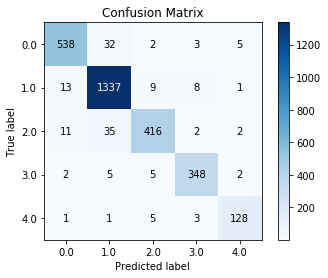

In [33]:
param = {
    'eta': 0.3, 
    'max_depth': 8,  
    'min_child_weight': 2,
    'objective': 'multi:softprob',  
    'num_class': 5} 

steps = 20  # The number of training iterations

model = xgb.train(param, D_train, steps)

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print(classification_report(y_test, best_preds))
plot_confusion_matrix(y_test, best_preds)